In [321]:

import numpy as np

In [322]:
def mean_squared_error(y_hat, y):
    return np.sum((y_hat - y)**2)/y.size

In [323]:
y      = np.array([1,   2,   3,    4])
y_hat1 = np.array([1.2, 1.9, 2.9,  4.2]) 
mean_squared_error(y_hat1, y)

0.025000000000000022

In [324]:
y_hat2 = np.array([2.2, 0.9, 2.9,  5.2]) 
mean_squared_error(y_hat2, y)

1.0250000000000004

In [325]:
def cross_entropy_error(y_hat, y):
    return -np.sum(y*np.log(y_hat + 1e-7))

In [326]:
y = np.array([0, 1, 0, 0, 0])

In [327]:

y_hat1 = np.array([0.1, 0.7, 0.1, 0.1, 0])

In [328]:
cross_entropy_error(y_hat1, y)

0.3566748010815999

In [329]:
y_hat2 = np.array([0.7, 0.05, 0.05, 0.2, 0])

In [330]:

cross_entropy_error(y_hat2, y)

2.9957302735559908

In [331]:
import mnist

my_mnist = mnist.Mnist()

File: train-images-idx3-ubyte.gz already exists locally.
File: train-labels-idx1-ubyte.gz already exists locally.
File: t10k-images-idx3-ubyte.gz already exists locally.
File: t10k-labels-idx1-ubyte.gz already exists locally.
Loading dataset from pickle: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW6/06/dataset/mnist.pkl
Dataset loaded successfully.


In [332]:
(train_images, train_labels), (_, _) = my_mnist.load()

In [333]:
train_size = train_images.shape[0]
batch_size = 32

In [334]:
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

[41376 13273 23998 22825 28135 31597 13549 22976 19416 28751  5022 32289
 10581 38929 37144 51391 27421 32841 27589 29990 39044 30390 12415 16532
 47599 22576  4829 20479 19774 38399 25304 36679]


In [335]:
train_size

60000

In [336]:
def cross_entropy_error(y_hat, y):
    batch_size = 1 if y_hat.ndim == 1 else y_hat.shape[0]
    return -np.sum(y*np.log(y_hat + 1e-7))/batch_size

In [337]:
y_hat_batch = np.array([ [0.2, 0.2, 0.3, 0.1, 0.2], [0.1, 0.1, 0.1, 0.1, 0.6]])
y_batch =     np.array([ [0,   0,   1,   0,    0],   [0,   0,   0,   0,   1]])

In [338]:
(0.1/10e-50)

1e+48

In [339]:
cross_entropy_error(y_hat_batch, y_batch)

0.8573989640459981

In [340]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x))/h

In [341]:
def func(x):
    return x**2 + 0.1*x

In [342]:
numerical_diff(func, 0.8)

0.0

In [343]:
# more reasonable approx
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [344]:
numerical_diff(func, 0.8)

1.6999999999994797

In [345]:
numerical_diff(func, 0.2)

0.49999999999994493

In [346]:
def func(x):
    return x[0]**2 + x[1]**2

def func_tmp1(x0):
    return x0**2 + 4.0**2

In [347]:

numerical_diff(func_tmp1, 3.0)

6.00000000000378

In [348]:
def func_tmp2(x1):
    return 3.0**2 + x1**2

In [349]:
numerical_diff(func_tmp2, 4.0)

7.999999999999119

## Numerical Gradient

In [351]:
import numpy as np

In [352]:
def func2(x):
    return x[0]**2 + x[1]**2

In [353]:
# partial derivatives when x0 = 3, x1 = 4

def func_tmp1(x0):
    return x0**2 + 4**2

def func_tmp2(x1):
    return 3**2 + x1**2

In [354]:
def _numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [355]:
def _numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) 
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val 
        
    return grad

In [356]:
_numerical_diff(func_tmp1, 3.0)

6.00000000000378

In [357]:
_numerical_diff(func_tmp2, 4.0)

7.999999999999119

In [358]:
_numerical_gradient(func2, np.array([3.0, 4.0]))

array([6., 8.])

In [359]:
def gradient_descent(f, init_x, lr=0.1, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = _numerical_gradient(f, x)
        x -= lr*grad  # x = x - lr*grad

    return x

In [360]:
init_x = np.array([2800.0, 1000.0])
# func2 = x0**2 + x1**2
gradient_descent(func2, init_x, step_num=10000, lr=0.001)

array([5.65680105e-06, 2.02028609e-06])

## SimpleNet

In [362]:
class SimpleNet:
    def __init__(self):
        self.w = np.random.randn(2, 3)


    # for multi-dimensional x
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)  
        return np.exp(x) / np.sum(np.exp(x))


    def cross_entroy_error(self, y, t):
        delta = 1e-7
        batch_size = 1 if y.ndim == 1 else y.shape[0]

        return -np.sum(t*np.log(y + delta)) / batch_size


    # for multi-dimensional x
    def numerical_gradient(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            x[idx] = tmp_val 
            it.iternext()   
            
        return grad


    def predict(self, x):
        return np.dot(x, self.w)
    

    def loss(self, x, y):
        z = self.predict(x)
        y_hat = self.softmax(z)
        loss = self.cross_entroy_error(y_hat, y)

        return loss

In [363]:
net = SimpleNet()
print(net.w)

[[-0.1988396   0.14299547  0.86231077]
 [-0.90436627  0.14081144 -0.65060149]]


In [364]:
x = np.array([0.7, 0.19])
p = net.predict(x)
print(p)

[-0.31101731  0.126851    0.48000326]


In [365]:
np.argmax(p)

2

In [366]:
y = np.array([0, 1, 0])
net.loss(x, y)

1.1213379903239098

In [367]:
y = np.array([0, 0, 1])
net.loss(x, y)

0.7681858291598309

In [368]:
def loss_function(w):
    return net.loss(x, y)

In [369]:
dw = net.numerical_gradient(loss_function, net.w)
print(dw)

[[ 0.14721197  0.22809035 -0.37530232]
 [ 0.03995753  0.06191024 -0.10186777]]


In [370]:
# using lamda
loss_function = lambda w: net.loss(x, y)

In [371]:
dw = net.numerical_gradient(loss_function, net.w)
print(dw)

[[ 0.14721197  0.22809035 -0.37530232]
 [ 0.03995753  0.06191024 -0.10186777]]


# TwoLayerNet class

In [373]:
class Activations:
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    # for multi-dimensional x
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)  
        return np.exp(x) / np.sum(np.exp(x))

In [374]:
class Errors:
    def cross_entroy_error(self, y, t):
        delta = 1e-7
        batch_size = 1 if y.ndim == 1 else y.shape[0]

        return -np.sum(t*np.log(y + delta)) / batch_size

In [375]:
import activations
import errors

In [376]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}

        self.params['w1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['w2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.activations = activations.Activations()
        self.errors = errors.Errors()

    def predict(self, x):
        w1, w2 = self.params['w1'], self.params['w2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, w1) + b1
        z1 = self.activations.sigmoid(a1)
        a2 = np.dot(z1, w2) + b2
        y = self.activations.softmax(a2)

        return y
    
    def loss(self, x, y):
        y_hat = self.predict(x)

        return self.errors.cross_entropy_error(y_hat, y)
    

    def accuracy(self, x, y):
        y_hat = self.predict(x)
        p = np.argmax(y_hat, axis=1)
        y_p = np.argmax(y, axis=1)

        return np.sum(p == y_p)/float(x.shape[0])
    

    # for multi-dimensional x
    def _numerical_gradient(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            x[idx] = tmp_val 
            it.iternext()   
            
        return grad
    

    def numerical_gradient(self, x, y):
        loss_w = lambda w: self.loss(x, y)

        grads = {}
        grads['w1'] = self._numerical_gradient(loss_w, self.params['w1'])
        grads['b1'] = self._numerical_gradient(loss_w, self.params['b1'])
        grads['w2'] = self._numerical_gradient(loss_w, self.params['w2'])
        grads['b2'] = self._numerical_gradient(loss_w, self.params['b2'])

        return grads
    

# Train TwoLayerNet

In [378]:
import mnist
from two_layer_net import TwoLayerNet

import matplotlib.pyplot as plt
import numpy as np

In [379]:
my_mnist = mnist.Mnist()

File: train-images-idx3-ubyte.gz already exists locally.
File: train-labels-idx1-ubyte.gz already exists locally.
File: t10k-images-idx3-ubyte.gz already exists locally.
File: t10k-labels-idx1-ubyte.gz already exists locally.
Loading dataset from pickle: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW6/06/dataset/mnist.pkl
Dataset loaded successfully.


In [380]:
(x_train, y_train), (x_test, y_test) = my_mnist.load()

In [381]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [382]:
network = TwoLayerNet(input_size=28*28, hidden_size=100, output_size=10)

In [383]:
network.params

{'w1': array([[ 0.01277634,  0.00902699,  0.02844181, ...,  0.01060857,
         -0.00534211,  0.0100141 ],
        [-0.01772073,  0.00551563,  0.01467955, ...,  0.00260196,
         -0.01604172, -0.01036561],
        [ 0.00539491,  0.00222672, -0.01364071, ...,  0.00832692,
         -0.000104  ,  0.00262404],
        ...,
        [-0.02053311, -0.0082245 , -0.01384812, ...,  0.00095653,
         -0.00181294, -0.00642946],
        [ 0.00479824, -0.00801507,  0.00357133, ...,  0.01043009,
          0.01265405, -0.0038007 ],
        [-0.01396166, -0.00585727,  0.00072895, ...,  0.00274195,
         -0.00222377, -0.01348624]]),
 'b1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [384]:
iterations = 10
train_size = x_train[:100].shape[0]
batch_size = 2
lr = 0.1

iter_per_ecoph = max(train_size/batch_size, 1)

In [385]:
train_losses = []
train_accs = []
test_accs = []

In [386]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.numerical_gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')

train acc, test_acc : 0.10441666666666667, 0.1028


In [387]:
network

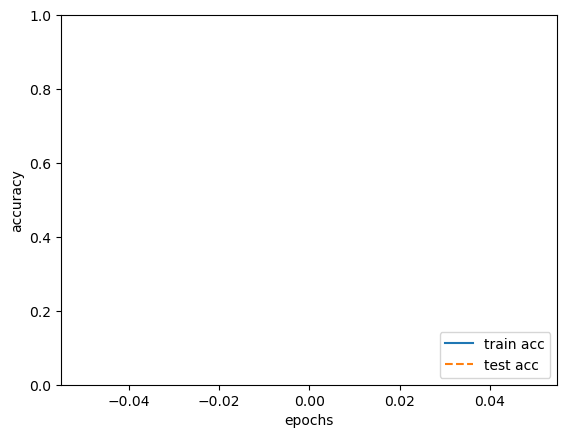

In [388]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# BackPropagation

In [390]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None
        self.activations = Activations()

    def forward(self, x):
        out = self.activations.sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Affine:
    def __init__(self, w, b):
        self.w = w
        self.b = b
        
        self.x = None
        self.original_x_shape = None

        self.dw = None
        self.db = None

    def forward(self, x):
        # 
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.w) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.w.T)
        self.dw = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None 
        self.y_hat = None    
        self.y = None    
        self.activations = Activations()
        self.errors = Errors()
        
    def forward(self, x, y):
        self.y = y
        self.y_hat = self.activations.softmax(x)
        self.loss = self.errors.cross_entropy_error(self.y_hat, self.y)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.y.shape[0]
        #if self.y.size == self.y_hat.size: # one hot encoding
        
        dx = (self.y_hat - self.y) / batch_size
        
        """
        else:
            dx = self.y_hat.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        """
        return dx

## Two Layer Net with Backpropagation

In [392]:
from activations import Activations
from errors import Errors

In [393]:
from collections import OrderedDict

In [394]:
class TwoLayerNetWithBackProp:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}

        self.params['w1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['w2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.activations = Activations()
        self.errors = Errors()

        # add layers
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['w1'], self.params['b1'])
        self.layers['Rele1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['w2'], self.params['b2'])

        self.last_layer = SoftmaxWithLoss()


    def predict(self, x):
        ## new implementation for backprop
        for layer in self.layers.values():
            x = layer.forward(x)

        y = x
        return y
    
    def loss(self, x, y):
        y_hat = self.predict(x)

        # return self.errors.cross_entropy_error(y_hat, y)
        return self.last_layer.forward(y_hat, y)

    def accuracy(self, x, y):
        y_hat = self.predict(x)
        p = np.argmax(y_hat, axis=1)
        y_p = np.argmax(y, axis=1)

        return np.sum(p == y_p)/float(x.shape[0])
    

    def gradient(self, x, y):
        self.loss(x, y)

        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['w1'] = self.layers['Affine1'].dw
        grads['b1'] = self.layers['Affine1'].db
        grads['w2'] = self.layers['Affine2'].dw
        grads['b2'] = self.layers['Affine2'].db
      
        return grads

In [395]:
from mnist import Mnist

In [396]:

mnist = Mnist()

File: train-images-idx3-ubyte.gz already exists locally.
File: train-labels-idx1-ubyte.gz already exists locally.
File: t10k-images-idx3-ubyte.gz already exists locally.
File: t10k-labels-idx1-ubyte.gz already exists locally.
Loading dataset from pickle: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW6/06/dataset/mnist.pkl
Dataset loaded successfully.


In [397]:
(x_train, y_train), (x_test, y_test) = mnist.load()

In [398]:
print(x_train.shape)

(60000, 784)


In [399]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)

In [400]:
iterations = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1

iter_per_ecoph = max(train_size/batch_size, 1)

In [401]:
train_losses = []
train_accs = []
test_accs = []

In [402]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')

train acc, test_acc : 0.12971666666666667, 0.1356
train acc, test_acc : 0.90725, 0.9123
train acc, test_acc : 0.9265333333333333, 0.9282
train acc, test_acc : 0.9404, 0.9408
train acc, test_acc : 0.9481, 0.947
train acc, test_acc : 0.9561, 0.9542
train acc, test_acc : 0.9621833333333333, 0.9593
train acc, test_acc : 0.9641333333333333, 0.9612
train acc, test_acc : 0.9693166666666667, 0.9647
train acc, test_acc : 0.9725833333333334, 0.9664
train acc, test_acc : 0.9737833333333333, 0.9672
train acc, test_acc : 0.97725, 0.9707
train acc, test_acc : 0.9782833333333333, 0.9718
train acc, test_acc : 0.9790666666666666, 0.9729
train acc, test_acc : 0.9815166666666667, 0.9747
train acc, test_acc : 0.9826333333333334, 0.9744
train acc, test_acc : 0.9841666666666666, 0.9743


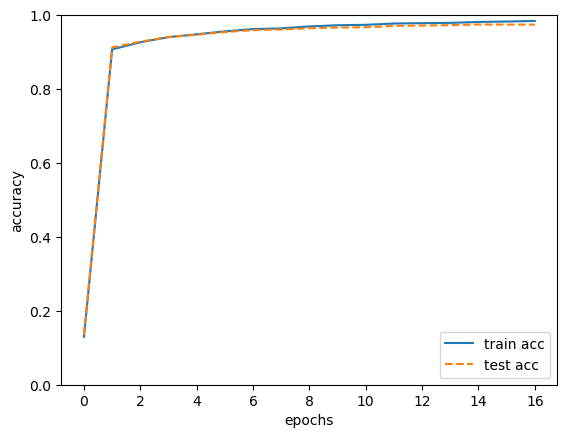

In [403]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [404]:
import numpy as np
import pickle

my_weight_pkl_file = 'AMD_weights.pkl'

In [405]:
with open(f'{my_weight_pkl_file}', 'wb') as f:
    print(f'Pickle: {my_weight_pkl_file} is being created.')
    pickle.dump(network.params, f)
    print('Done.') 

Pickle: AMD_weights.pkl is being created.
Done.


In [406]:
network.params = None

## Using your own TwoLayerNet model

In [408]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)

In [409]:
with open(f'{my_weight_pkl_file}', 'rb') as f:
    network.params = pickle.load(f)

In [410]:
from mnist import Mnist

In [411]:
mnist = Mnist()
(_, _), (x_test, y_test) = mnist.load()

File: train-images-idx3-ubyte.gz already exists locally.
File: train-labels-idx1-ubyte.gz already exists locally.
File: t10k-images-idx3-ubyte.gz already exists locally.
File: t10k-labels-idx1-ubyte.gz already exists locally.
Loading dataset from pickle: /Users/aishwaryadekhane/Desktop/My_Files/Sem-3/PRNN/HW6/06/dataset/mnist.pkl
Dataset loaded successfully.


In [412]:
y_hat = network.predict(x_test[0:100])

In [413]:

import matplotlib.pyplot as plt

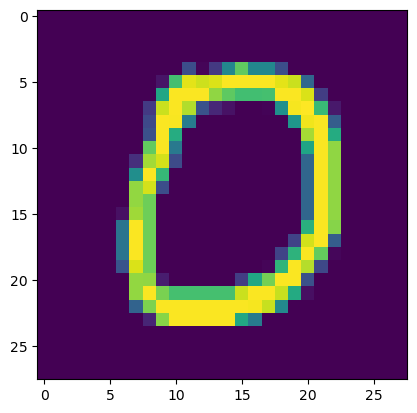

In [414]:
plt.imshow(x_test[10].reshape(28,28))

In [415]:
y_hat[10]

array([ 0.00257086, -0.00482891,  0.00084426,  0.01003397,  0.00235773,
       -0.0091246 ,  0.0058809 ,  0.00071354, -0.00904647, -0.01322207])

In [416]:
y_hat[10]

array([ 0.00257086, -0.00482891,  0.00084426,  0.01003397,  0.00235773,
       -0.0091246 ,  0.0058809 ,  0.00071354, -0.00904647, -0.01322207])

In [417]:
np.argmax(y_hat[10])

3

In [418]:
np.argmax(y_test[10])

0